In [1]:
# siloutte score, min poiunts different different
#Graph where varying minpoints and epsilon values is compared
#Also do K-means


In [28]:
import pandas as pd

In [29]:
df = pd.read_csv("/content/marketing_campaign.csv", sep='\t')

In [30]:
df.shape

(2240, 29)

In [31]:
display(df.head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [32]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


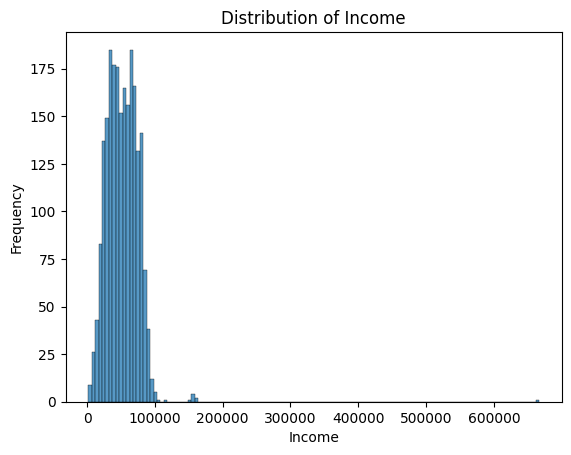

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Income'])
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

In [34]:
df['Income'].fillna(df['Income'].median(), inplace=True)
display(df.isnull().sum())

/tmp/ipython-input-137277889.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [35]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

None

In [36]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [37]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
irrelevant_cols = ['ID', 'Z_CostContact', 'Z_Revenue', 'Response']
clustering_cols = [col for col in numerical_cols if col not in irrelevant_cols]
df_clustering = df[clustering_cols]
display(df_clustering.head())

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
0,1957,58138.0,0,0,58,635,88,546,172,88,...,8,10,4,7,0,0,0,0,0,0
1,1954,46344.0,1,1,38,11,1,6,2,1,...,1,1,2,5,0,0,0,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,8,2,10,4,0,0,0,0,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,2,0,4,6,0,0,0,0,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,5,3,6,5,0,0,0,0,0,0


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)
df_scaled = pd.DataFrame(df_scaled, columns=df_clustering.columns)
display(df_scaled.head())

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain
0,-0.985345,0.235696,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,...,1.409304,2.510890,-0.550785,0.693904,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282
1,-1.235733,-0.235454,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,...,-1.110409,-0.568720,-1.166125,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282
2,-0.317643,0.773999,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,...,1.409304,-0.226541,1.295237,-0.542647,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282
3,1.268149,-1.022355,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,...,-0.750450,-0.910898,-0.550785,0.281720,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282
4,1.017761,0.241888,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,...,0.329427,0.115638,0.064556,-0.130463,-0.28014,-0.28383,-0.28014,-0.262111,-0.11651,-0.097282


In [39]:
from sklearn.metrics import silhouette_score

silhouette_scores = {}

eps_values = [0.5, 1.0, 1.5, 2.0]
min_samples_values = [5, 10, 15, 20]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(df_scaled)
        n_unique_labels = len(set(clusters)) - (1 if -1 in clusters else 0)

        if n_unique_labels > 1:
            score = silhouette_score(df_scaled, clusters)
            silhouette_scores[(eps, min_samples)] = score
        else:
            silhouette_scores[(eps, min_samples)] = -1

display(silhouette_scores)

{(0.5, 5): np.float64(-0.23072520731333163),
 (0.5, 10): -1,
 (0.5, 15): -1,
 (0.5, 20): -1,
 (1.0, 5): np.float64(-0.16343244833119297),
 (1.0, 10): np.float64(-0.08883488289441932),
 (1.0, 15): np.float64(-0.0971750293093816),
 (1.0, 20): np.float64(-0.1491460856165673),
 (1.5, 5): np.float64(-0.07974563582630186),
 (1.5, 10): np.float64(-0.00556173926158562),
 (1.5, 15): np.float64(-0.018166741640311273),
 (1.5, 20): np.float64(-0.04055561414980188),
 (2.0, 5): np.float64(-0.05490910142729728),
 (2.0, 10): np.float64(0.13507099415845103),
 (2.0, 15): np.float64(0.12946828015295297),
 (2.0, 20): np.float64(0.12777115097844213)}

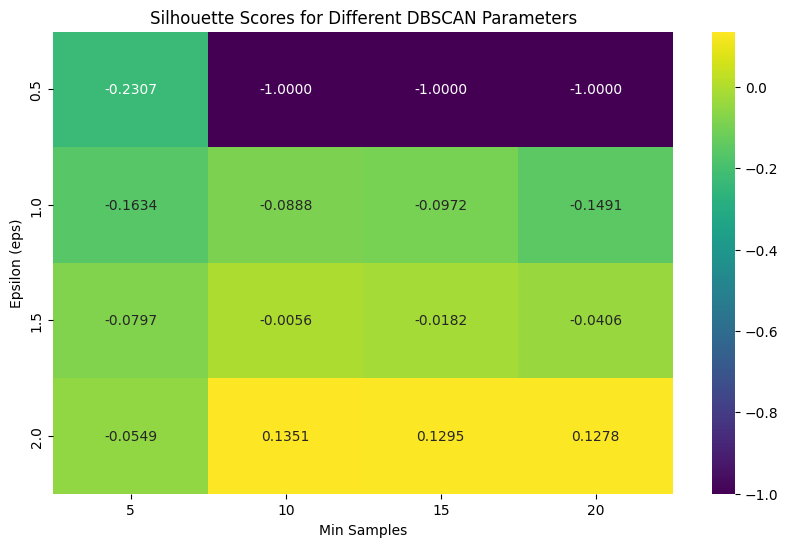

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

silhouette_df = pd.DataFrame(list(silhouette_scores.items()), columns=['parameters', 'silhouette_score'])
silhouette_df[['eps', 'min_samples']] = pd.DataFrame(silhouette_df['parameters'].tolist(), index=silhouette_df.index)

silhouette_pivot = silhouette_df.pivot(index='eps', columns='min_samples', values='silhouette_score')

plt.figure(figsize=(10, 6))
sns.heatmap(silhouette_pivot, annot=True, cmap='viridis', fmt=".4f")
plt.title('Silhouette Scores for Different DBSCAN Parameters')
plt.xlabel('Min Samples')
plt.ylabel('Epsilon (eps)')
plt.show()

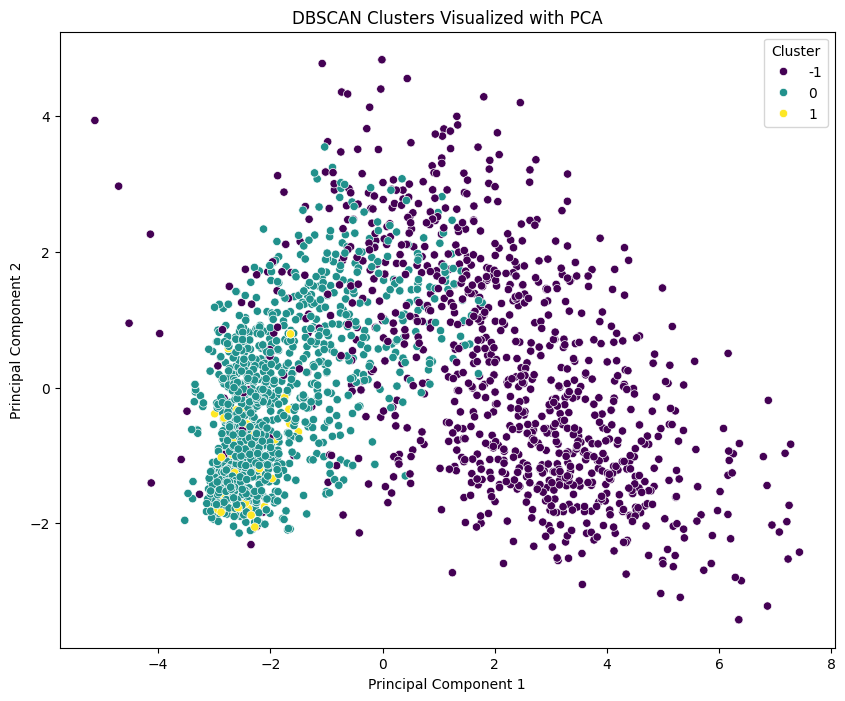

In [41]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
# Closer to one hoga then nice
best_eps = 2.0
best_min_samples = 10

dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
df['DBSCAN_Labels'] = dbscan.fit_predict(df_scaled)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['DBSCAN_Labels']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', legend='full')
plt.title('DBSCAN Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

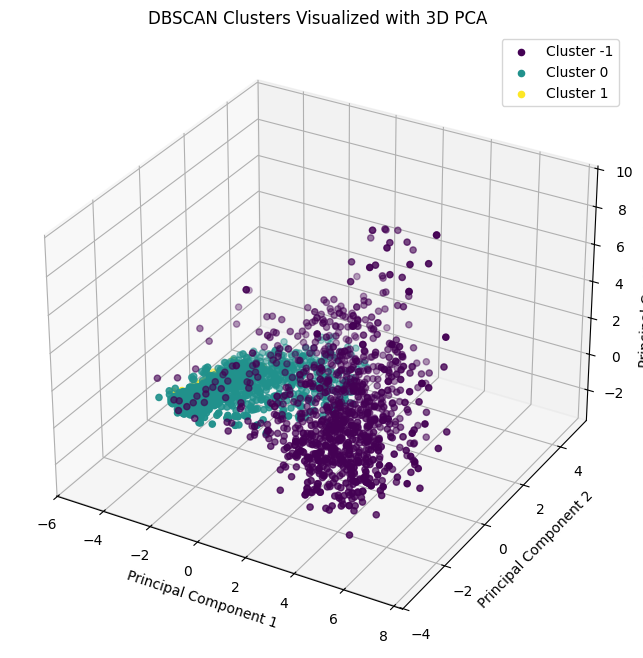

In [53]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

pca_3d = PCA(n_components=3)
pca_components_3d = pca_3d.fit_transform(df_scaled)

pca_df_3d = pd.DataFrame(data=pca_components_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df_3d['Cluster'] = df['DBSCAN_Labels']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.viridis(np.linspace(0, 1, len(pca_df_3d['Cluster'].unique())))
cluster_colors = {label: colors[i] for i, label in enumerate(pca_df_3d['Cluster'].unique())}

for cluster_label in pca_df_3d['Cluster'].unique():
    subset = pca_df_3d[pca_df_3d['Cluster'] == cluster_label]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], c=[cluster_colors[cluster_label]], label=f'Cluster {cluster_label}', s=20)


ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('DBSCAN Clusters Visualized with 3D PCA')
ax.legend()
#ax.view_init(elev=20, azim=60)
plt.show()

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


k_values = range(2, 15, 2)

inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)



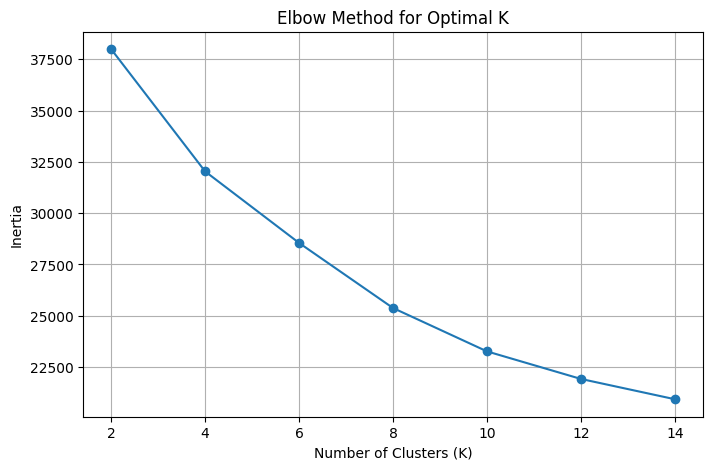

In [44]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [46]:
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10)
df['KMeans_Labels'] = kmeans.fit_predict(df_scaled)

display(df['KMeans_Labels'].value_counts())

,count
KMeans_Labels,
0,558
6,521
3,447
2,379
4,175
1,109
5,30
7,21


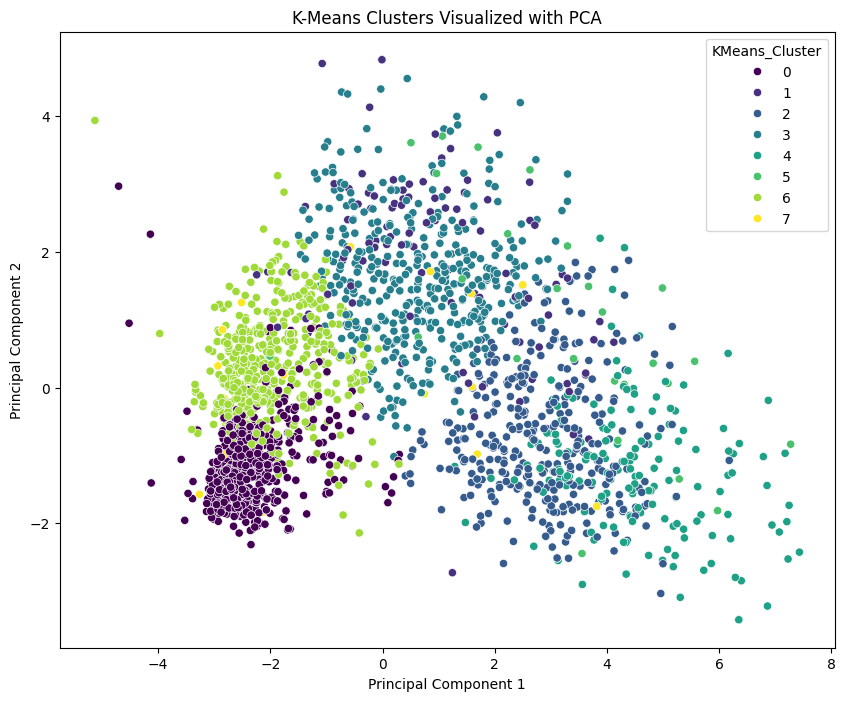

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

pca_df['KMeans_Cluster'] = df['KMeans_Labels']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Cluster', data=pca_df, palette='viridis', legend='full')
plt.title('K-Means Clusters Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()